In [245]:
import pandas as pd
import requests
import random
from time import sleep
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import numpy as np
import nltk
import os
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import datetime
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
import matplotlib.style as style

%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [246]:
df = pd.read_pickle("Data/Fitbit_and_MFP_Cleaned.pkl")

df.reset_index(inplace=True)

df.head(50)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories,Day_of_week
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN,Friday
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN,Saturday
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2,Sunday
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1,Monday
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3,Tuesday
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3,Wednesday
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5,Thursday
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9,Friday
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0,Saturday
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN,Sunday


In [247]:
## INTERPOLATING WEIGHTS THAT ARE MISSING

df.Weight = df.Weight.interpolate(method='linear')
df.drop('Day_of_week', axis=1, inplace=True)

df.head(562)

,Date,Steps,Distance,Calories_Burned,Floors,Elevation,Activity_Calories,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,...,Carbohydrates_(g)_Dinner,Fiber_Dinner,Sugar_Dinner,Protein_(g)_Dinner,Vitamin_A_Dinner,Vitamin_C_Dinner,Calcium_Dinner,Iron_Dinner,Weight,Net_Calories
0,2016-12-16,7949.359551,6.100120,1856.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,NaN,NaN
1,2016-12-17,5514.820225,4.235007,1855.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,NaN,NaN
2,2016-12-18,4782.921348,3.679812,1855.0,5.146067,15.494382,702.179775,1440.0,85.123596,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,NaN,-1110.2
3,2016-12-19,6743.966292,5.175902,1855.0,4.640449,13.977528,869.786517,1440.0,127.393258,9.348315,...,30.000000,10.000000,15.000000,5.000000,40.000000,125.000000,10.000000,10.000000,186.800000,-660.1
4,2016-12-20,7318.181818,5.671428,1854.0,5.215909,15.704545,911.261364,1440.0,148.397727,8.636364,...,44.000000,1.900000,14.100000,47.700000,18.000000,48.800000,2.500000,25.400000,186.483333,-154.3
5,2016-12-21,7112.386364,5.472372,1854.0,3.909091,11.761364,899.102273,1440.0,155.465909,7.477273,...,56.232967,4.378022,8.345055,42.856044,11.289011,16.280220,11.697802,21.106593,186.166667,-978.3
6,2016-12-22,7365.511364,5.715491,1854.0,4.420455,13.284091,857.477273,1440.0,145.545455,6.340909,...,72.000000,4.000000,6.942857,31.000000,9.000000,12.935065,24.000000,23.000000,185.850000,-142.5
7,2016-12-23,7949.359551,6.100120,1853.0,6.528090,19.629213,1059.067416,1440.0,180.853933,8.977528,...,52.296429,4.801786,9.191071,39.676786,9.469643,16.176786,9.782143,11.300000,185.533333,-1036.9
8,2016-12-24,5514.820225,4.235007,1853.0,7.089888,21.438202,781.202247,1440.0,102.426966,13.404494,...,59.961765,4.600000,9.650000,42.591176,13.979412,20.058824,25.000000,24.091176,185.216667,-903.0
9,2016-12-25,1178.000000,0.882320,2074.0,3.000000,9.000000,268.000000,1368.0,72.000000,12.157303,...,71.923256,5.353488,10.444186,45.627907,17.386047,54.534884,10.860465,23.369767,184.900000,NaN


In [248]:
sixty_percent = int(np.ceil(0.95*len(df)))

train_df = df[:575]

holdout_df = df[575:]

In [249]:
prophet = Prophet(mcmc_samples=100,changepoint_range=0.99)

pro_train_df = train_df[['Date','Weight']]

pro_train_df.rename(columns={"Date": "ds", "Weight": "y"}, inplace=True)

pro_train_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ds,y
0,2016-12-16,NaN
1,2016-12-17,NaN
2,2016-12-18,NaN
3,2016-12-19,186.800000
4,2016-12-20,186.483333
5,2016-12-21,186.166667
6,2016-12-22,185.850000
7,2016-12-23,185.533333
8,2016-12-24,185.216667
9,2016-12-25,184.900000


In [250]:
df['Steps']

0       7949.359551
1       5514.820225
2       4782.921348
3       6743.966292
4       7318.181818
5       7112.386364
6       7365.511364
7       7949.359551
8       5514.820225
9       1178.000000
10      4058.000000
11      6378.000000
12      9507.000000
13      6472.000000
14      2989.000000
15       784.000000
16       137.000000
17      4791.000000
18      5224.000000
19      7864.000000
20      4709.000000
21     13146.000000
22      3002.000000
23      4392.000000
24      5423.000000
25     10152.000000
26      9289.000000
27      6284.000000
28     13866.000000
29      5606.000000
           ...     
590     4782.921348
591     6743.966292
592     3985.000000
593     4173.000000
594     7469.000000
595    10066.000000
596     8927.000000
597     2260.000000
598     7036.000000
599    10049.000000
600     9404.000000
601     3897.000000
602     7947.000000
603     3713.000000
604     9530.000000
605     9455.000000
606     5213.000000
607      284.000000
608     7299.000000


In [251]:
train_extra_df = train_df[['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

extra_regressors = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

ssX = StandardScaler()
train_extra_df = pd.DataFrame(ssX.fit_transform(train_extra_df), columns = train_extra_df.columns)

for i in extra_regressors:
    pro_train_df[i] = train_extra_df[i]

pro_train_df

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ds,y,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,...,Calories_Dinner,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner
0,2016-12-16,NaN,0.175759,1.380101,0.224594,-0.279306,-0.395964,-0.235443,-0.292924,-0.469814,...,-0.419541,-0.380155,-0.415843,-0.560220,-0.138348,-0.124246,-0.203127,-0.295473,-0.005843,-0.325053
1,2016-12-17,NaN,-0.372442,1.380101,-0.936206,-0.005767,-0.157371,0.707883,0.624353,0.787167,...,-0.081871,0.424150,-0.403147,-0.700526,-0.059498,-0.303320,-0.108711,-0.027083,0.068759,-0.140953
2,2016-12-18,NaN,-0.537248,1.380101,-1.192314,-0.082830,-0.130903,-0.368116,0.160489,-0.767827,...,0.727995,0.248910,0.060158,0.385668,-0.048710,0.287802,0.560471,0.391731,0.197858,0.050875
3,2016-12-19,186.800000,-0.095667,1.380101,-0.566679,-0.256395,-0.138466,-1.016501,-0.995889,-0.894842,...,-2.404719,-0.300400,-0.238657,-0.206744,0.999524,0.039982,-1.577531,-1.076149,0.938430,-2.515562
4,2016-12-20,186.483333,0.033632,1.380101,-0.255791,-0.300386,-0.355733,0.638081,-0.995889,-0.894842,...,-0.839297,-1.187018,-0.565821,-0.214199,-0.724030,-0.434191,4.676350,-0.585960,0.792131,0.181768
5,2016-12-21,186.166667,-0.012708,1.380101,-0.151175,-0.372006,-0.461280,2.773549,2.842303,2.048347,...,-0.230040,-0.322594,-0.125509,-0.146484,-0.515088,-0.113280,0.046821,-0.157641,-0.143367,-0.124221
6,2016-12-22,185.850000,0.044290,1.380101,-0.298008,-0.442221,-0.462810,0.352912,-0.995889,-0.894842,...,-0.342921,0.306679,-0.276373,-0.240638,-0.599708,-0.308743,-1.518142,0.394418,-0.371302,-0.873159
7,2016-12-23,185.533333,0.175759,1.380101,0.224594,-0.279306,-0.395964,-0.465975,-0.380794,-0.818633,...,-0.419541,-0.380155,-0.415843,-0.560220,-0.138348,-0.124246,-0.203127,-0.295473,-0.005843,-0.325053
8,2016-12-24,185.216667,-0.372442,1.380101,-0.936206,-0.005767,-0.157371,-0.022311,-0.306983,-0.937011,...,-0.081871,0.424150,-0.403147,-0.700526,-0.059498,-0.303320,-0.108711,-0.027083,0.068759,-0.140953
9,2016-12-25,184.900000,-1.348991,1.138827,-1.386556,-0.082830,-0.130903,0.537397,0.271017,0.569698,...,0.727995,0.248910,0.060158,0.385668,-0.048710,0.287802,0.560471,0.391731,0.197858,0.050875


In [252]:
pro_train_df['Floor'] = 170

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
for i in extra_regressors:
    prophet.add_regressor(i)

prophet.fit(pro_train_df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [254]:
future = prophet.make_future_dataframe(periods=len(holdout_df))
#future.set_index('ds', inplace=True)
future

,ds
0,2016-12-16
1,2016-12-17
2,2016-12-18
3,2016-12-19
4,2016-12-20
5,2016-12-21
6,2016-12-22
7,2016-12-23
8,2016-12-24
9,2016-12-25


In [255]:
#df.set_index('Date', inplace=True)

steps_regressors_df = df[['Date','Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']]

scalable_columns = ['Steps','Minutes_Sedentary', 'Minutes_Lightly_Active',
       'Minutes_Fairly_Active', 'Minutes_Very_Active', 'Calories_Breakfast',
       'Saturated_Fat_Breakfast', 'Cholesterol_Breakfast',
       'Polyunsaturated_Fat_Breakfast', 'Monounsaturated_Fat_Breakfast',
       'Trans_Fat_Breakfast', 'Carbohydrates_(g)_Breakfast', 'Sugar_Breakfast',
       'Sodium_(mg)_Breakfast',
       'Protein_(g)_Breakfast', 'Calories_Lunch', 'Saturated_Fat_Lunch',
       'Polyunsaturated_Fat_Lunch', 'Monounsaturated_Fat_Lunch',
       'Trans_Fat_Lunch', 'Cholesterol_Lunch', 'Sodium_(mg)_Lunch',
       'Carbohydrates_(g)_Lunch', 'Sugar_Lunch', 'Protein_(g)_Lunch',
       'Calories_Dinner', 'Saturated_Fat_Dinner', 'Polyunsaturated_Fat_Dinner',
       'Monounsaturated_Fat_Dinner', 'Trans_Fat_Dinner', 'Cholesterol_Dinner',
       'Sodium_(mg)_Dinner', 'Carbohydrates_(g)_Dinner',
       'Sugar_Dinner', 'Protein_(g)_Dinner']

steps_regressors_df = pd.DataFrame(ssX.transform(steps_regressors_df[scalable_columns]), columns = steps_regressors_df[scalable_columns].columns)

steps_regressors_df = pd.DataFrame(steps_regressors_df)

steps_regressors_df['Date'] = df['Date']

In [256]:
future = future.merge(steps_regressors_df, left_on='ds', right_on='Date', how='left')

In [257]:
future.drop(columns=['Date'], inplace=True)

future['floor'] = 170

future

,ds,Steps,Minutes_Sedentary,Minutes_Lightly_Active,Minutes_Fairly_Active,Minutes_Very_Active,Calories_Breakfast,Saturated_Fat_Breakfast,Cholesterol_Breakfast,Polyunsaturated_Fat_Breakfast,...,Saturated_Fat_Dinner,Polyunsaturated_Fat_Dinner,Monounsaturated_Fat_Dinner,Trans_Fat_Dinner,Cholesterol_Dinner,Sodium_(mg)_Dinner,Carbohydrates_(g)_Dinner,Sugar_Dinner,Protein_(g)_Dinner,floor
0,2016-12-16,0.175759,1.380101,0.224594,-0.279306,-0.395964,-0.235443,-0.292924,-0.469814,-0.620911,...,-0.380155,-0.415843,-0.560220,-0.138348,-0.124246,-0.203127,-0.295473,-0.005843,-0.325053,170
1,2016-12-17,-0.372442,1.380101,-0.936206,-0.005767,-0.157371,0.707883,0.624353,0.787167,-0.053464,...,0.424150,-0.403147,-0.700526,-0.059498,-0.303320,-0.108711,-0.027083,0.068759,-0.140953,170
2,2016-12-18,-0.537248,1.380101,-1.192314,-0.082830,-0.130903,-0.368116,0.160489,-0.767827,-0.979086,...,0.248910,0.060158,0.385668,-0.048710,0.287802,0.560471,0.391731,0.197858,0.050875,170
3,2016-12-19,-0.095667,1.380101,-0.566679,-0.256395,-0.138466,-1.016501,-0.995889,-0.894842,-0.454482,...,-0.300400,-0.238657,-0.206744,0.999524,0.039982,-1.577531,-1.076149,0.938430,-2.515562,170
4,2016-12-20,0.033632,1.380101,-0.255791,-0.300386,-0.355733,0.638081,-0.995889,-0.894842,-0.658801,...,-1.187018,-0.565821,-0.214199,-0.724030,-0.434191,4.676350,-0.585960,0.792131,0.181768,170
5,2016-12-21,-0.012708,1.380101,-0.151175,-0.372006,-0.461280,2.773549,2.842303,2.048347,4.625891,...,-0.322594,-0.125509,-0.146484,-0.515088,-0.113280,0.046821,-0.157641,-0.143367,-0.124221,170
6,2016-12-22,0.044290,1.380101,-0.298008,-0.442221,-0.462810,0.352912,-0.995889,-0.894842,-0.738873,...,0.306679,-0.276373,-0.240638,-0.599708,-0.308743,-1.518142,0.394418,-0.371302,-0.873159,170
7,2016-12-23,0.175759,1.380101,0.224594,-0.279306,-0.395964,-0.465975,-0.380794,-0.818633,-0.620911,...,-0.380155,-0.415843,-0.560220,-0.138348,-0.124246,-0.203127,-0.295473,-0.005843,-0.325053,170
8,2016-12-24,-0.372442,1.380101,-0.936206,-0.005767,-0.157371,-0.022311,-0.306983,-0.937011,-0.053464,...,0.424150,-0.403147,-0.700526,-0.059498,-0.303320,-0.108711,-0.027083,0.068759,-0.140953,170
9,2016-12-25,-1.348991,1.138827,-1.386556,-0.082830,-0.130903,0.537397,0.271017,0.569698,-0.334821,...,0.248910,0.060158,0.385668,-0.048710,0.287802,0.560471,0.391731,0.197858,0.050875,170


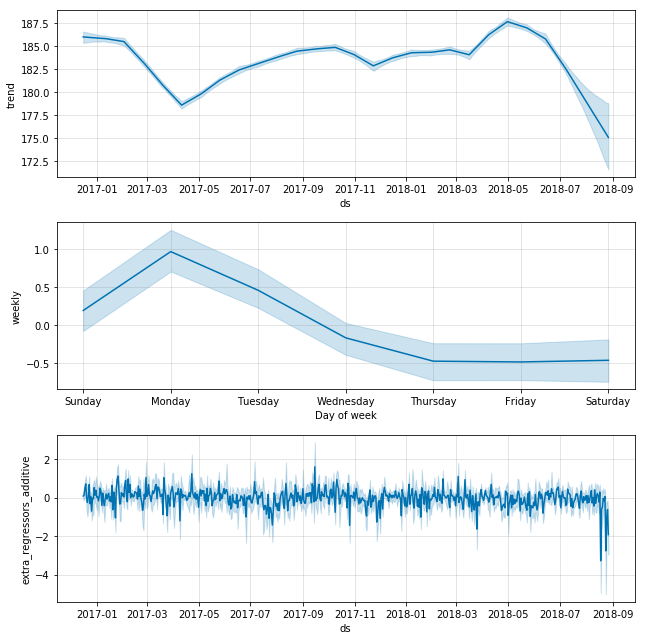

In [258]:
forecast = prophet.predict(future)
fig = prophet.plot_components(forecast)

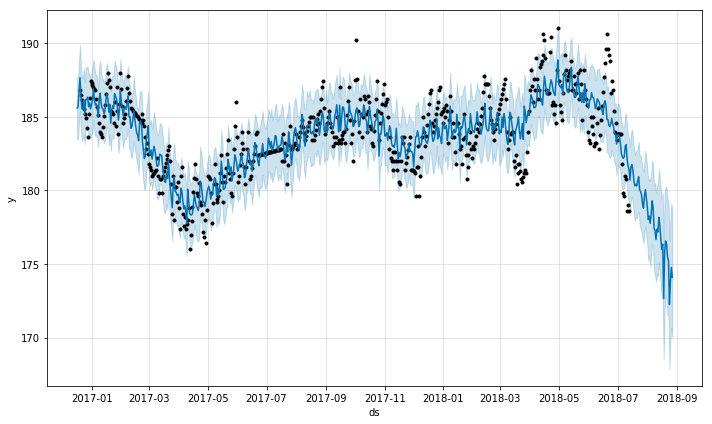

In [259]:
fig1 = prophet.plot(forecast)

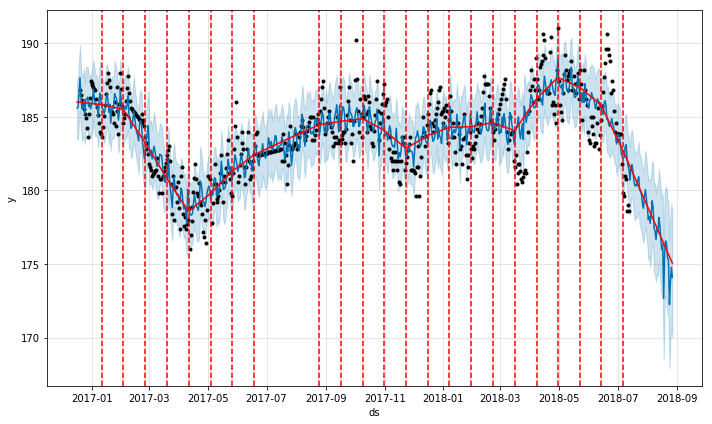

In [260]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

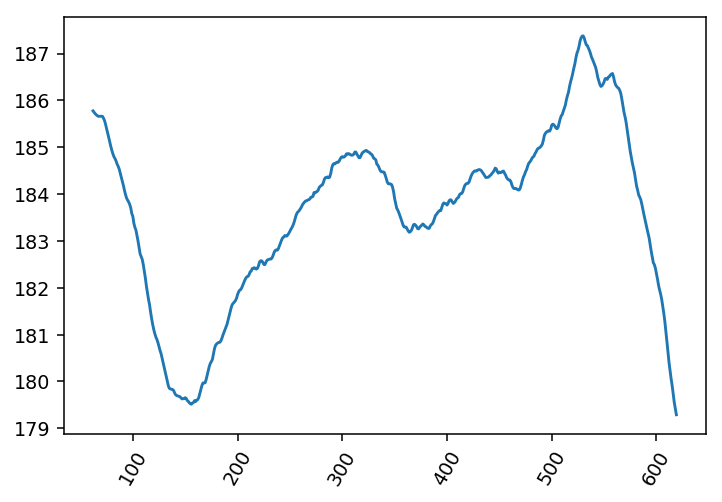

In [261]:
#df.set_index('Date', inplace=True)
df["Weight_MA60"] = df.Weight.rolling(window=60).mean()
plt.figure(dpi=138)
plt.plot(df.Weight_MA60)
plt.xticks(rotation=60);

In [262]:
len(holdout_df)

45

In [263]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Calories_Breakfast,Calories_Breakfast_lower,Calories_Breakfast_upper,Calories_Dinner,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-12-16,186.003430,183.470604,187.601585,185.346083,186.597408,-0.047289,-0.132405,0.031605,0.122906,...,0.076808,-0.130070,0.267300,-0.489876,-0.729613,-0.243663,0.0,0.0,0.0,185.590362
1,2016-12-17,185.996712,183.459562,187.637871,185.364214,186.556873,0.142325,-0.095121,0.398499,0.023891,...,0.121808,-0.105784,0.356790,-0.468186,-0.751767,-0.192288,0.0,0.0,0.0,185.650335
2,2016-12-18,185.989994,184.658036,188.874610,185.380622,186.532934,-0.073957,-0.207073,0.049428,-0.213587,...,0.495373,0.133837,0.864299,0.188896,-0.081240,0.453549,0.0,0.0,0.0,186.674263
3,2016-12-19,185.983275,185.429419,189.869104,185.398094,186.523178,-0.204286,-0.571985,0.136532,0.705021,...,0.706970,0.188320,1.137480,0.965735,0.703526,1.252068,0.0,0.0,0.0,187.655981
4,2016-12-20,185.976557,184.197315,188.500112,185.416394,186.512826,0.128295,-0.085744,0.359215,0.245992,...,-0.027539,-0.674014,0.640508,0.455066,0.223035,0.732107,0.0,0.0,0.0,186.404084
5,2016-12-21,185.969839,183.338327,187.681735,185.428269,186.498702,0.557537,-0.372622,1.561057,0.067339,...,-0.256211,-0.987507,0.435433,-0.172104,-0.396065,0.023768,0.0,0.0,0.0,185.541525
6,2016-12-22,185.963121,183.532285,187.670865,185.438303,186.475999,0.070974,-0.047435,0.198721,0.100439,...,0.057699,-0.490352,0.556386,-0.479532,-0.731821,-0.243002,0.0,0.0,0.0,185.541288
7,2016-12-23,185.956403,183.730676,188.267897,185.452725,186.450990,-0.093627,-0.262148,0.062574,0.122906,...,0.672113,0.230879,1.088175,-0.489876,-0.729613,-0.243663,0.0,0.0,0.0,186.138639
8,2016-12-24,185.949685,183.100655,187.345037,185.458343,186.425876,-0.004448,-0.012454,0.002973,0.023891,...,-0.317086,-0.763141,0.150244,-0.468186,-0.751767,-0.192288,0.0,0.0,0.0,185.164413
9,2016-12-25,185.942966,184.137109,188.379602,185.468368,186.400924,0.108057,-0.072218,0.302550,-0.213587,...,0.039599,-0.208755,0.297313,0.188896,-0.081240,0.453549,0.0,0.0,0.0,186.171461


In [264]:
forecast.columns[-13:]

Index(['additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [239]:
forecast[['additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat', 'yhat_lower', 'yhat_upper']]

,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_lower,yhat_upper
0,-0.396459,-0.676458,-0.133680,0.067520,-0.136229,0.282278,-0.463979,-0.719293,-0.212937,0.0,0.0,0.0,185.520522,183.300755,187.599104
1,-0.351880,-0.625996,-0.086329,0.122106,-0.075640,0.328316,-0.473986,-0.745740,-0.197752,0.0,0.0,0.0,185.561082,183.357999,187.529465
2,0.672714,0.283274,1.095593,0.514283,0.169479,0.863384,0.158431,-0.129710,0.469890,0.0,0.0,0.0,186.581656,184.393210,188.688586
3,1.691862,1.050223,2.252709,0.743880,0.188734,1.203979,0.947982,0.672419,1.218332,0.0,0.0,0.0,187.596784,185.409603,189.724517
4,0.543818,-0.135776,1.335679,0.070061,-0.559320,0.785854,0.473758,0.242144,0.706558,0.0,0.0,0.0,186.444720,184.170207,188.620521
5,-0.451091,-1.320752,0.317592,-0.282794,-1.155753,0.522864,-0.168297,-0.407671,0.086631,0.0,0.0,0.0,185.445791,183.249238,187.822090
6,-0.386235,-0.995200,0.148656,0.087674,-0.404394,0.543196,-0.473909,-0.693134,-0.249854,0.0,0.0,0.0,185.506627,183.385235,187.539141
7,0.220591,-0.262800,0.680610,0.684570,0.237926,1.141037,-0.463979,-0.719293,-0.212937,0.0,0.0,0.0,186.109433,183.953992,188.275736
8,-0.807076,-1.364915,-0.244390,-0.333090,-0.807482,0.201072,-0.473986,-0.745740,-0.197752,0.0,0.0,0.0,185.077746,182.866471,187.314128
9,0.221773,-0.040717,0.457520,0.063341,-0.192882,0.346447,0.158431,-0.129710,0.469890,0.0,0.0,0.0,186.102575,183.828541,188.247424


In [240]:
forecast.to_pickle("Data/Prophet_Forecast.pkl")

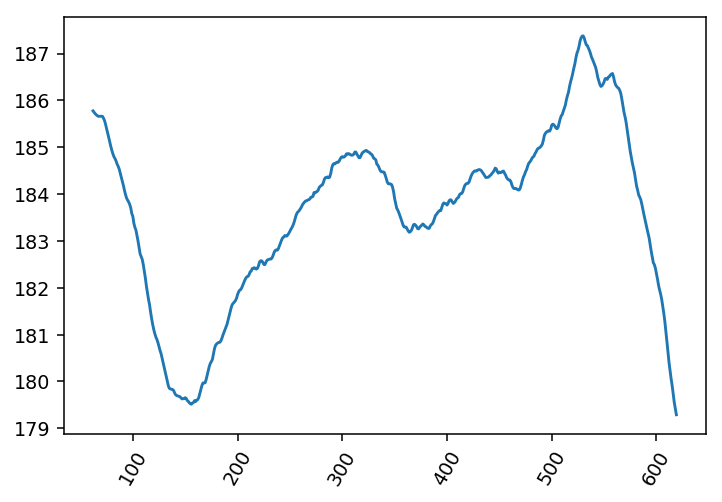

In [241]:
df["Weight_MA60"] = df.Weight.rolling(window=60).mean()
plt.figure(dpi=138)
plt.plot(df.Weight_MA60)
plt.xticks(rotation=60);

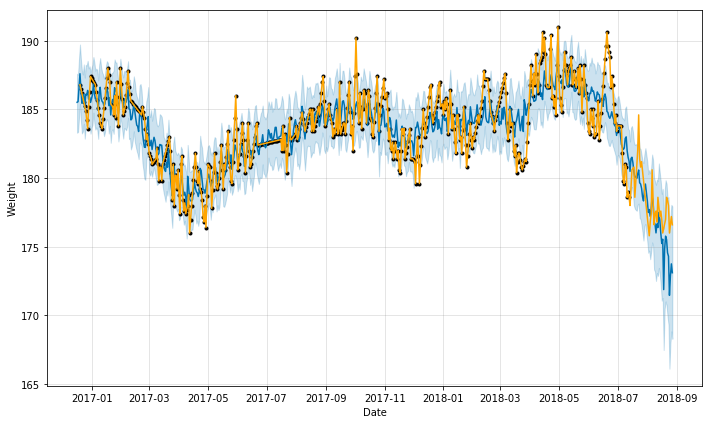

In [244]:
fig1 = prophet.plot(forecast)
#df.set_index('Date', inplace=True)
fig1 = plt.plot(df.Weight, color='orange')
fig1 = plt.ylabel('Weight')
fig1 = plt.xlabel('Date')

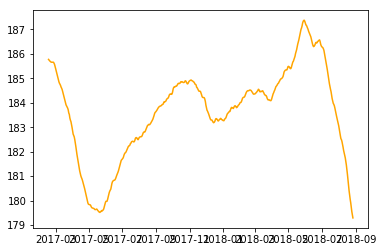

In [243]:
plt.plot(df.Weight_MA60, color='orange')

In [269]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, horizon = '30 days')
df_cv.head()

INFO:fbprophet.diagnostics:Making 31 forecasts with cutoffs between 2017-03-20 00:00:00 and 2018-06-13 00:00:00
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-21,181.485448,179.705269,183.400195,182.714286,2017-03-20
1,2017-03-22,181.155065,179.493378,182.751521,183.000000,2017-03-20
2,2017-03-23,181.750541,179.714844,183.596391,182.000000,2017-03-20
3,2017-03-24,184.346658,182.377604,186.318460,180.400000,2017-03-20
4,2017-03-25,182.673028,180.320025,184.939078,178.400000,2017-03-20


In [270]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
692,3 days,3.910359,1.977463,1.469165,0.007953,0.709677
363,4 days,3.905153,1.976146,1.466843,0.007940,0.709677
33,4 days,3.725787,1.930230,1.438745,0.007785,0.709677
543,4 days,3.799931,1.949341,1.456838,0.007882,0.698925
183,4 days,3.846602,1.961276,1.469600,0.007950,0.688172


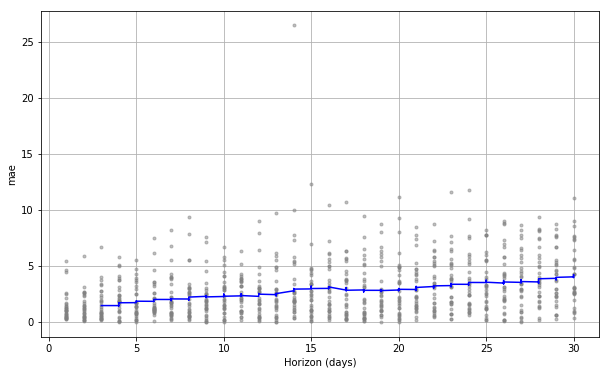

In [273]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [275]:
df_cv.head(31)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-03-21,181.485448,179.705269,183.400195,182.714286,2017-03-20
1,2017-03-22,181.155065,179.493378,182.751521,183.000000,2017-03-20
2,2017-03-23,181.750541,179.714844,183.596391,182.000000,2017-03-20
3,2017-03-24,184.346658,182.377604,186.318460,180.400000,2017-03-20
4,2017-03-25,182.673028,180.320025,184.939078,178.400000,2017-03-20
5,2017-03-26,184.431286,181.574773,187.178861,181.000000,2017-03-20
6,2017-03-27,183.571201,180.867854,186.090340,178.000000,2017-03-20
7,2017-03-28,183.144852,180.302839,186.033153,180.200000,2017-03-20
8,2017-03-29,182.144998,178.744446,185.273339,180.200000,2017-03-20
9,2017-03-30,183.324217,179.887296,186.671849,179.200000,2017-03-20
